**Pranshu Thirani**

**220801**


**Assignment 5**

-----------------------

Solution 1.1:


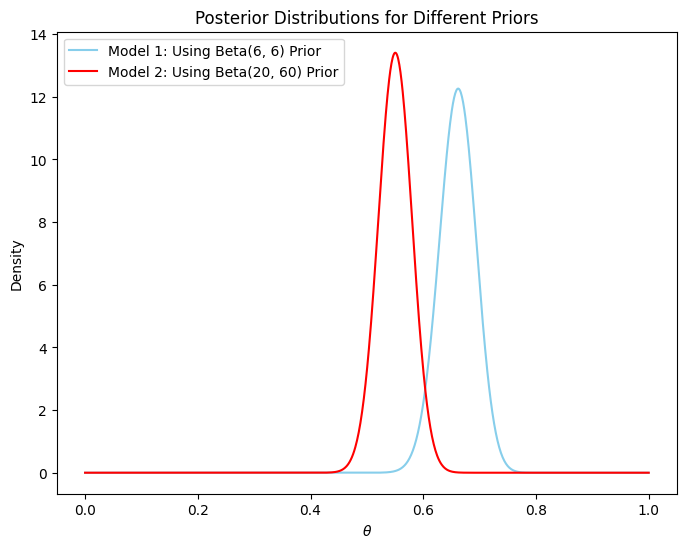

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given data points
data = [10, 15, 15, 14, 14, 14, 13, 11, 12, 16]
n = 20

# Model 1: Beta(6, 6) prior
alpha_prior_1 = 6
beta_prior_1 = 6
alpha_post_1 = alpha_prior_1 + sum(data)
beta_post_1 = beta_prior_1 + n * len(data) - sum(data)

# Model 2: Beta(20, 60) prior
alpha_prior_2 = 20
beta_prior_2 = 60
alpha_post_2 = alpha_prior_2 + sum(data)
beta_post_2 = beta_prior_2 + n * len(data) - sum(data)

# Generating x values for plotting
theta = np.linspace(0, 1, 1000) #Took 1000 values
posterior_1 = stats.beta.pdf(theta, alpha_post_1, beta_post_1)
posterior_2 = stats.beta.pdf(theta, alpha_post_2, beta_post_2)

# Combined plot for both posteriors
plt.figure(figsize=(8, 6))
plt.plot(theta, posterior_1, label='Model 1: Using Beta(6, 6) Prior', color = "skyblue")
plt.plot(theta, posterior_2, label='Model 2: Using Beta(20, 60) Prior', color='red')
plt.title('Posterior Distributions for Different Priors')
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.legend()
plt.show()


Solution 1.2:

In [30]:
# Function to compute log predictive density
def log_predictive_density(data, alpha_post, beta_post, n_samples=10000):
    # Draw samples from the posterior distribution
    theta_samples = np.random.beta(alpha_post, beta_post, n_samples)

    # Calculate log predictive density for each data point
    lpd = np.zeros(len(data))
    for i, y in enumerate(data):
        predictive_density = stats.binom.pmf(y, n, theta_samples)
        lpd[i] = np.log(np.mean(predictive_density))

    # Sum up the log predictive densities to obtain lppd
    lppd = np.sum(lpd)

    return lppd

# Model 1: Beta(6, 6) prior
alpha_prior_1 = 6
beta_prior_1 = 6
alpha_post_1 = alpha_prior_1 + sum(data)
beta_post_1 = beta_prior_1 + n * len(data) - sum(data)
lppd_model_1 = log_predictive_density(data, alpha_post_1, beta_post_1)

# Model 2: Beta(20, 60) prior
alpha_prior_2 = 20
beta_prior_2 = 60
alpha_post_2 = alpha_prior_2 + sum(data)
beta_post_2 = beta_prior_2 + n * len(data) - sum(data)
lppd_model_2 = log_predictive_density(data, alpha_post_2, beta_post_2)

print(f'Log pointwise predictive density for Model 1: {lppd_model_1}')
print(f'Log pointwise predictive density for Model 2: {lppd_model_2}')


Log pointwise predictive density for Model 1: -20.373027623173147
Log pointwise predictive density for Model 2: -25.929734999294876


In [31]:
# Compute in-sample deviance for each model
in_sample_deviance_model_1 = -2 * lppd_model_1
in_sample_deviance_model_2 = -2 * lppd_model_2

print(f'In-sample deviance for Model 1: {in_sample_deviance_model_1}')
print(f'In-sample deviance for Model 2: {in_sample_deviance_model_2}')


In-sample deviance for Model 1: 40.746055246346295
In-sample deviance for Model 2: 51.85946999858975


A measure of model fit, the in-sample deviation is computed as −2×lppd. Lower numbers indicate greater fit. It measures how well the model fits the observed data. Because it is determined using the same data that were used to fit the model rather than a different test set, this metric is known as "in-sample deviance".

Solution 1.4:

We compare the in-sample deviance values computed for the two models to ascertain whether model provides a better match to the data. It is believed that the model that best fits the data is the one with the lower in-sample deviation.

As Model 1 has lower in-sample deviance (40.75 compared to Model 2 at 51.73), it is the preferred model.

Solution 1.5:

In [32]:
# New data points for out-of-sample testing
new_data = [5, 6, 10, 8, 9]

# Compute lppd for new data points
lppd_new_model_1 = log_predictive_density(new_data, alpha_post_1, beta_post_1)
lppd_new_model_2 = log_predictive_density(new_data, alpha_post_2, beta_post_2)

# Compute out-of-sample deviance for each model
out_sample_deviance_model_1 = -2 * lppd_new_model_1
out_sample_deviance_model_2 = -2 * lppd_new_model_2

print(f'Out-of-sample deviance for Model 1: {out_sample_deviance_model_1}')
print(f'Out-of-sample deviance for Model 2: {out_sample_deviance_model_2}')

Out-of-sample deviance for Model 1: 50.52085207880127
Out-of-sample deviance for Model 2: 31.602394922465653


Solution 1.6:

In [33]:
# Writing function to compute log predictive density for one data point
def log_predictive_density_one_point(y, data, alpha_prior, beta_prior, n_samples=10000):
    # Fit the model on all data points except the one being left out
    data_train = np.delete(data, y)
    alpha_post = alpha_prior + sum(data_train)
    beta_post = beta_prior + n * len(data_train) - sum(data_train)

    # Draw samples from the posterior distribution
    theta_samples = np.random.beta(alpha_post, beta_post, n_samples)

    # Calculate the log predictive density for the left-out data point
    predictive_density = stats.binom.pmf(data[y], n, theta_samples)
    lpd = np.log(np.mean(predictive_density))

    return lpd

# Function to perform LOO-CV and compute the LOO-CV lppd
def loo_cv(data, alpha_prior, beta_prior, n_samples=10000):
    lppd_loo = 0
    for i in range(len(data)):
        lpd = log_predictive_density_one_point(i, data, alpha_prior, beta_prior, n_samples)
        lppd_loo += lpd

    return lppd_loo

# Perform LOO-CV for both models
lppd_loo_model_1 = loo_cv(data, alpha_prior_1, beta_prior_1)
lppd_loo_model_2 = loo_cv(data, alpha_prior_2, beta_prior_2)

# Compute in-sample deviance for each model
in_sample_deviance_loo_model_1 = -2 * lppd_loo_model_1
in_sample_deviance_loo_model_2 = -2 * lppd_loo_model_2

print(f'LOO-CV log pointwise predictive density for Model 1: {lppd_loo_model_1}')
print(f'LOO-CV log pointwise predictive density for Model 2: {lppd_loo_model_2}')

print(f'Formula: In-sample deviance (LOO-CV) for a Model = -2*LPPD (LOO-CV) of that Model')

print(f'In-sample deviance (LOO-CV) for Model 1: {in_sample_deviance_loo_model_1}')
print(f'In-sample deviance (LOO-CV) for Model 2: {in_sample_deviance_loo_model_2}')


LOO-CV log pointwise predictive density for Model 1: -21.11346855875325
LOO-CV log pointwise predictive density for Model 2: -27.219759704173352
Formula: In-sample deviance (LOO-CV) for a Model = -2*LPPD (LOO-CV) of that Model
In-sample deviance (LOO-CV) for Model 1: 42.2269371175065
In-sample deviance (LOO-CV) for Model 2: 54.439519408346705


---------------------------------

The model with the lower in-sample deviance from LOO-CV is considered to have better predictive performance.

In this question, that will be Model 1 at 42.20 compared to Model 2's 54.45

Solution 2.1:

In [34]:
import math
from scipy.special import comb,gamma

def marginal_likelihood(n, k, a, b):
    # Compute binomial coefficient
    binomial_coeff = comb(n, k)

    # Compute gamma terms instead of factorials
    numerator = gamma(k + a) * gamma(n - k + b)
    denominator = gamma(n + a + b)

    # Compute marginal likelihood
    marginal_likelihood = binomial_coeff * (numerator / denominator)

    return marginal_likelihood

# Parameters
n = 10
k = 2
priors = [
    (0.1, 0.4),
    (1, 1),
    (2, 6),
    (6, 2),
    (20, 60),
    (60, 20)
]

# Calculate marginal likelihood for each prior
results = {}
for a, b in priors:
    likelihood = marginal_likelihood(n, k, a, b)
    results[(a, b)] = likelihood

print('Analytical Values of Marginal Likelihood:')
# Print results
for prior, likelihood in results.items():
    print(f"Beta({prior[0]}, {prior[1]}): {likelihood:.2e}")


Analytical Values of Marginal Likelihood:
Beta(0.1, 0.4): 4.74e-01
Beta(1, 1): 9.09e-02
Beta(2, 6): 4.73e-03
Beta(6, 2): 2.31e-04
Beta(20, 60): 5.08e-21
Beta(60, 20): 1.51e-23


Solution 2.2:

In [35]:
from scipy.stats import beta
num_samples = 100000  # Number of samples for Monte Carlo integration

def binomial_likelihood(n, k, theta):
    """Calculate the binomial likelihood."""
    return comb(n, k) * (theta ** k) * ((1 - theta) ** (n - k))

# Estimate marginal likelihood using Monte Carlo Integration
def monte_carlo_marginal_likelihood(n, k, a, b, num_samples):
    # Draw samples from the Beta distribution
    samples = beta.rvs(a, b, size=num_samples)

    # Calculate the likelihood for each sample
    likelihoods = np.array([binomial_likelihood(n, k, theta) for theta in samples])

    # Average the likelihoods
    marginal_likelihood_estimate = np.mean(likelihoods)

    return marginal_likelihood_estimate

# Calculate marginal likelihood for each prior using Monte Carlo Integration
results_mc = {}
for a, b in priors:
    likelihood_estimate = monte_carlo_marginal_likelihood(n, k, a, b, num_samples)
    results_mc[(a, b)] = likelihood_estimate
print('Monte Carlo Estimates for Marginal Likelihood:')
# Print results
for prior, likelihood in results_mc.items():
    print(f"Beta({prior[0]}, {prior[1]}): {likelihood:.2e}")

Monte Carlo Estimates for Marginal Likelihood:
Beta(0.1, 0.4): 3.94e-02
Beta(1, 1): 9.08e-02
Beta(2, 6): 1.99e-01
Beta(6, 2): 9.80e-03
Beta(20, 60): 2.69e-01
Beta(60, 20): 8.08e-04
